# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Step 0.1: Loading necessary packages

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

## Step 0.2: Load all test image and visualize them

In [4]:
test_img_dir = "test_images/"
original_image_names = os.listdir(test_img_dir)

original_image_names = list(map(lambda name: test_img_dir + name, original_image_names))
print(original_image_names)

['test_images/solidYellowCurve.jpg', 'test_images/solidYellowLeft.jpg', 'test_images/solidYellowCurve2.jpg', 'test_images/solidWhiteRight.jpg', 'test_images/whiteCarLaneSwitch.jpg', 'test_images/solidWhiteCurve.jpg']


In [5]:
# Util function to show all the test image
def show_image_list(img_list, cols=2, fig_size=(20, 20), img_labels=original_image_names, show_ticks=True):
    img_count = len(img_list)
    rows = img_count / cols
    cmap = None
    plt.figure(figsize=fig_size)
    for i in range(0, img_count):
        img_name = img_labels[i]      
        plt.subplot(rows, cols, i+1)
        img = img_list[i]
        print(img.shape)
        if len(img.shape) < 3:
            cmap = "gray"
        
        if not show_ticks:
            plt.xticks([])
            plt.yticks([])
            
        plt.title(img_name[len(test_img_dir):])    
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()
    plt.show()

Total image count:  6
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)


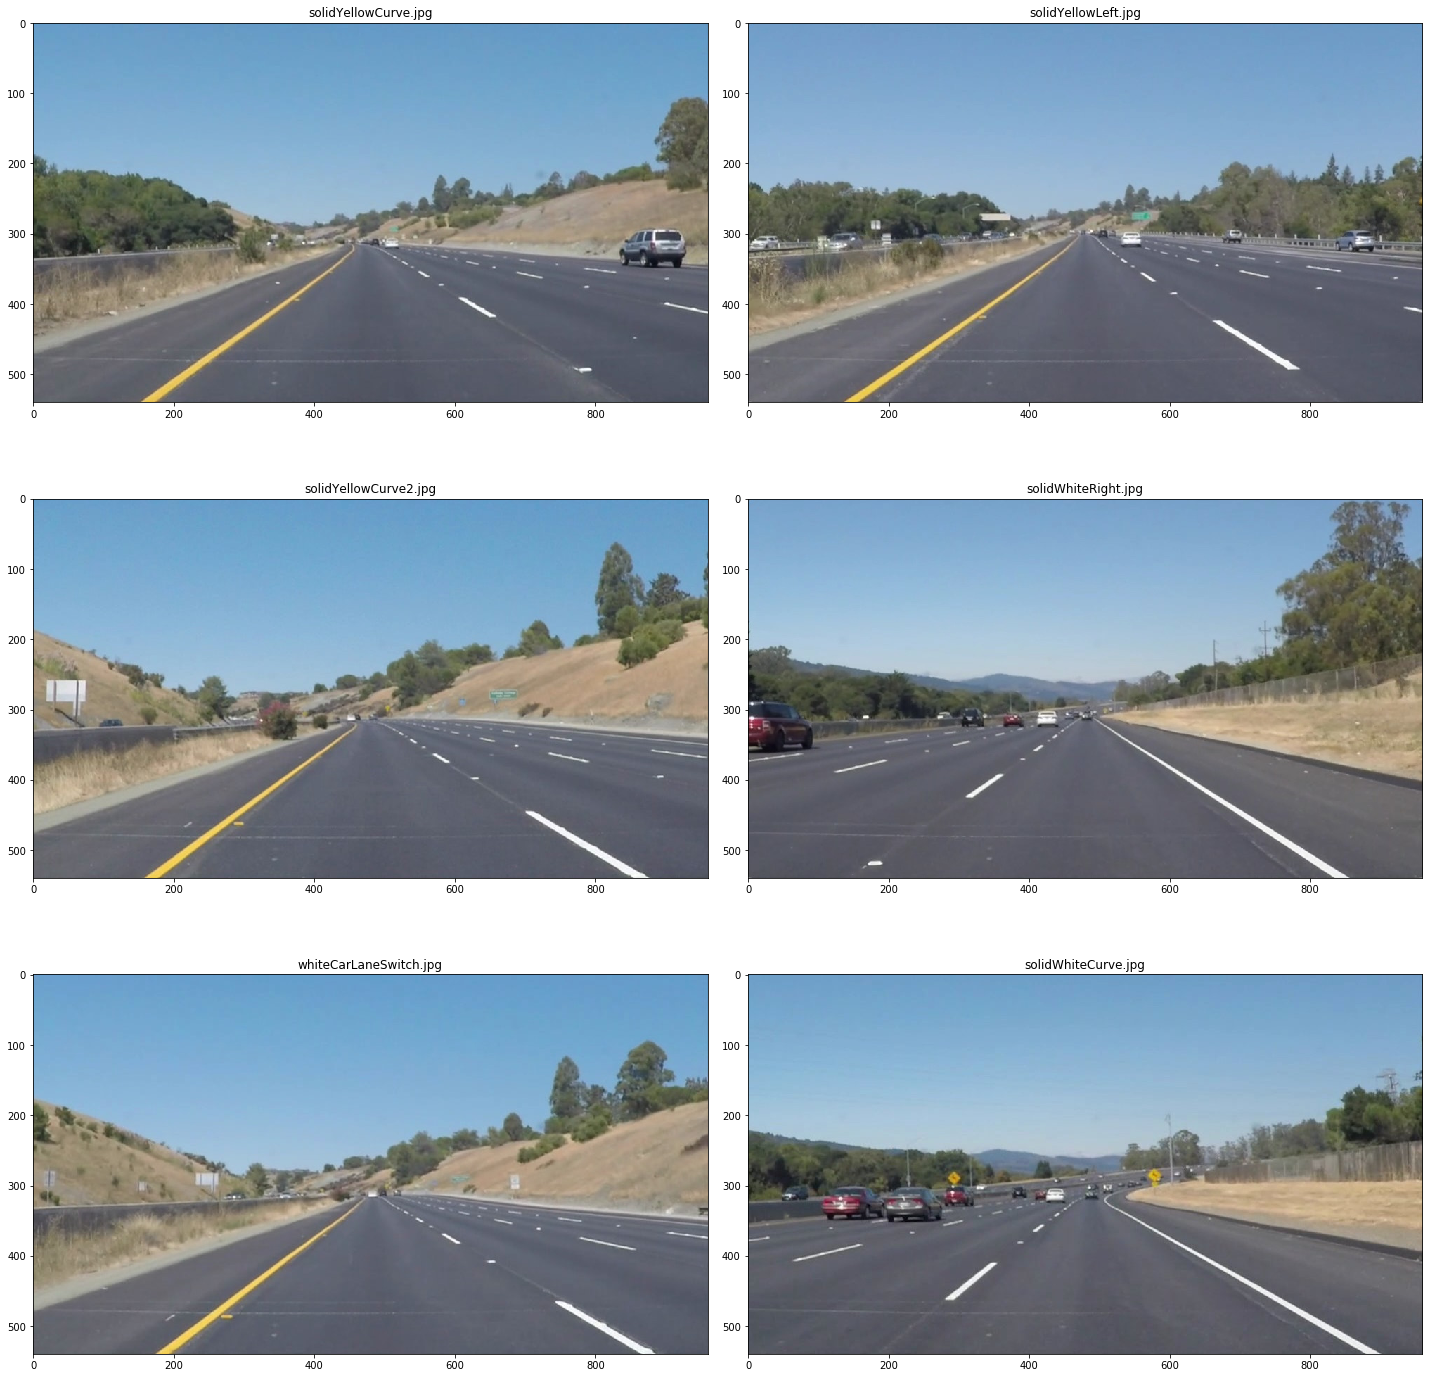

In [6]:
original_images = list(map(lambda img_name: mpimg.imread(img_name), original_image_names))
print("Total image count: ", len(original_images))
show_image_list(original_images)

In [7]:
img_shape = original_images[0].shape
img_shape

(540, 960, 3)

# Lane Finding Pipeline

## Step 1: Convert to Gray Scale

We are interested in detecting white or yellow lines on images, which show a particularly high contrast when the image is in grayscale. Remember that the road is black, so anything that is much brighter on the road will come out with a high contrast in a grayscale image.

In [8]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)


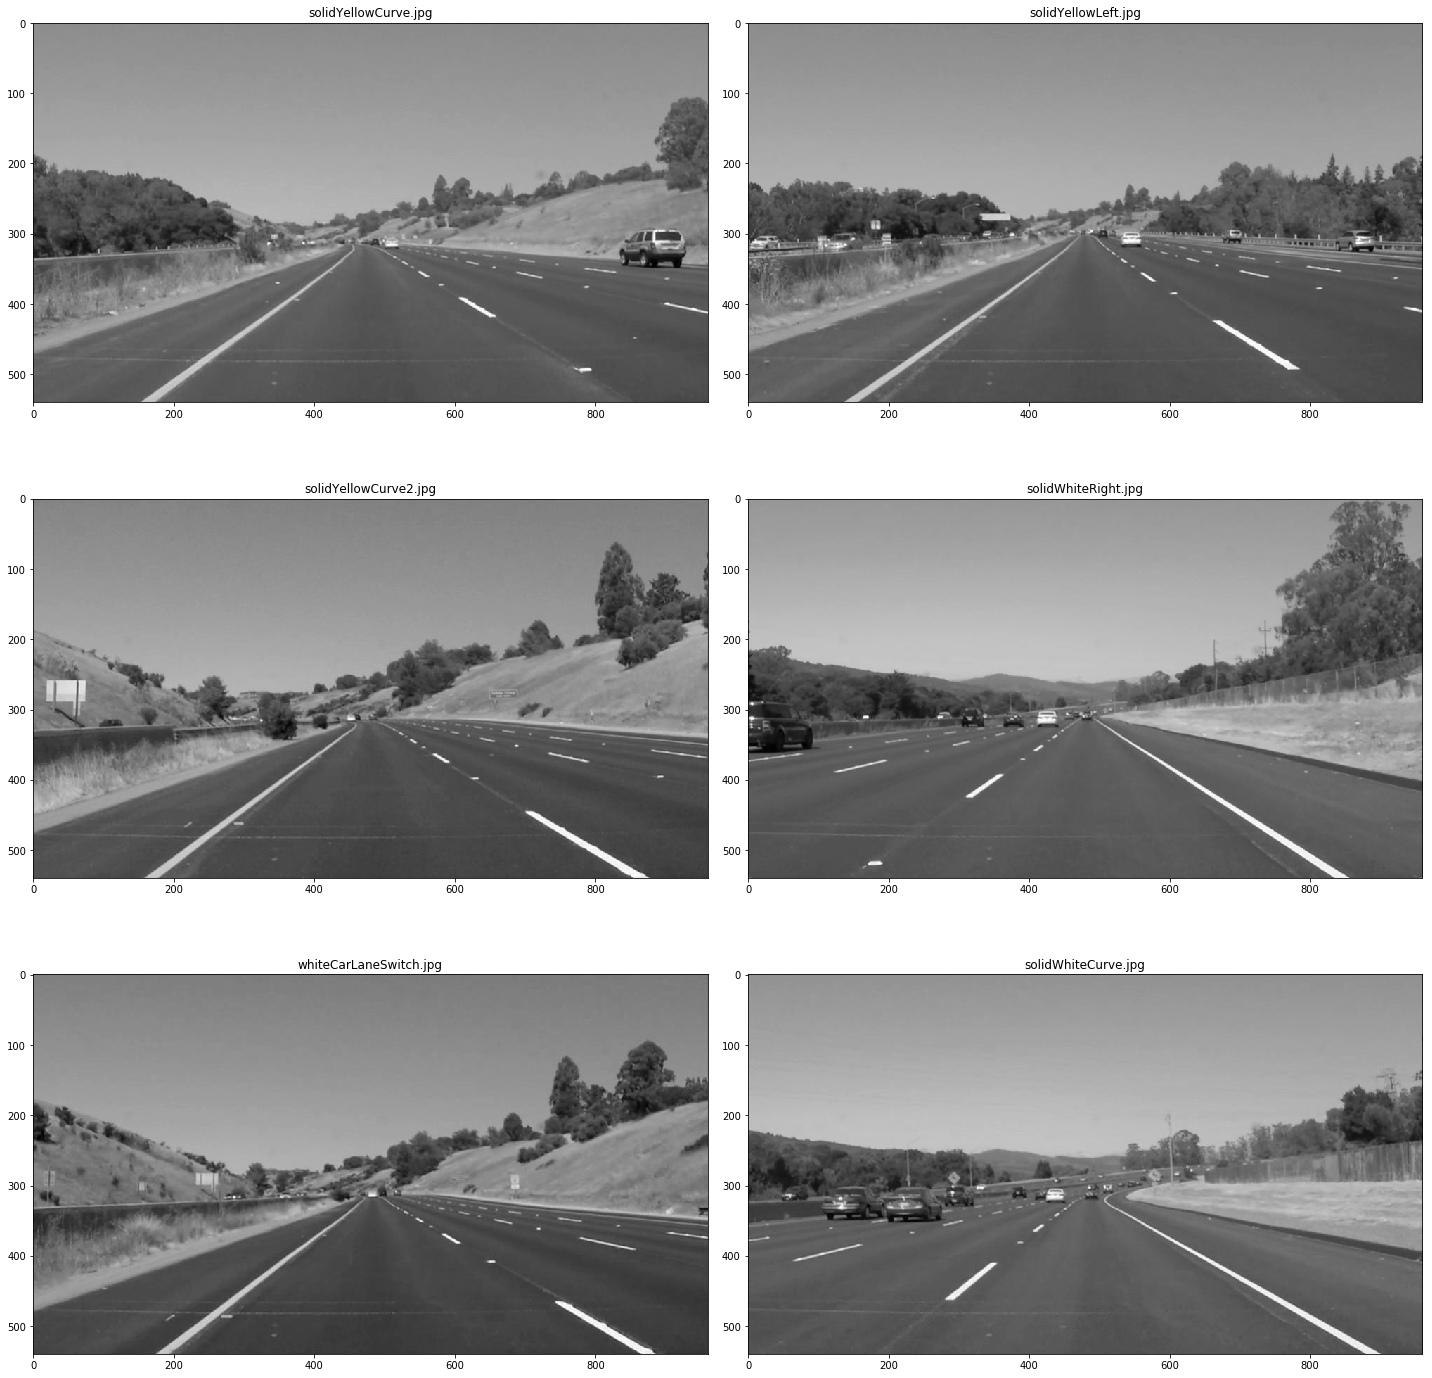

In [9]:
grayscale_images = list(map(lambda img: grayscale(img), original_images))
show_image_list(grayscale_images)

## Step 2: Guassian Blur

Gaussian blur is a pre-processing technique used to smoothen the edges of an image to reduce noise.

In [13]:
def gaussian_blur(grayscale_img, kernel_size=3):
    return cv2.GaussianBlur(grayscale_img, (kernel_size, kernel_size), 0) 

In [14]:
blurred_images = list(map(lambda img: gaussian_blur(img, kernel_size=7), grayscale_images))

(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)


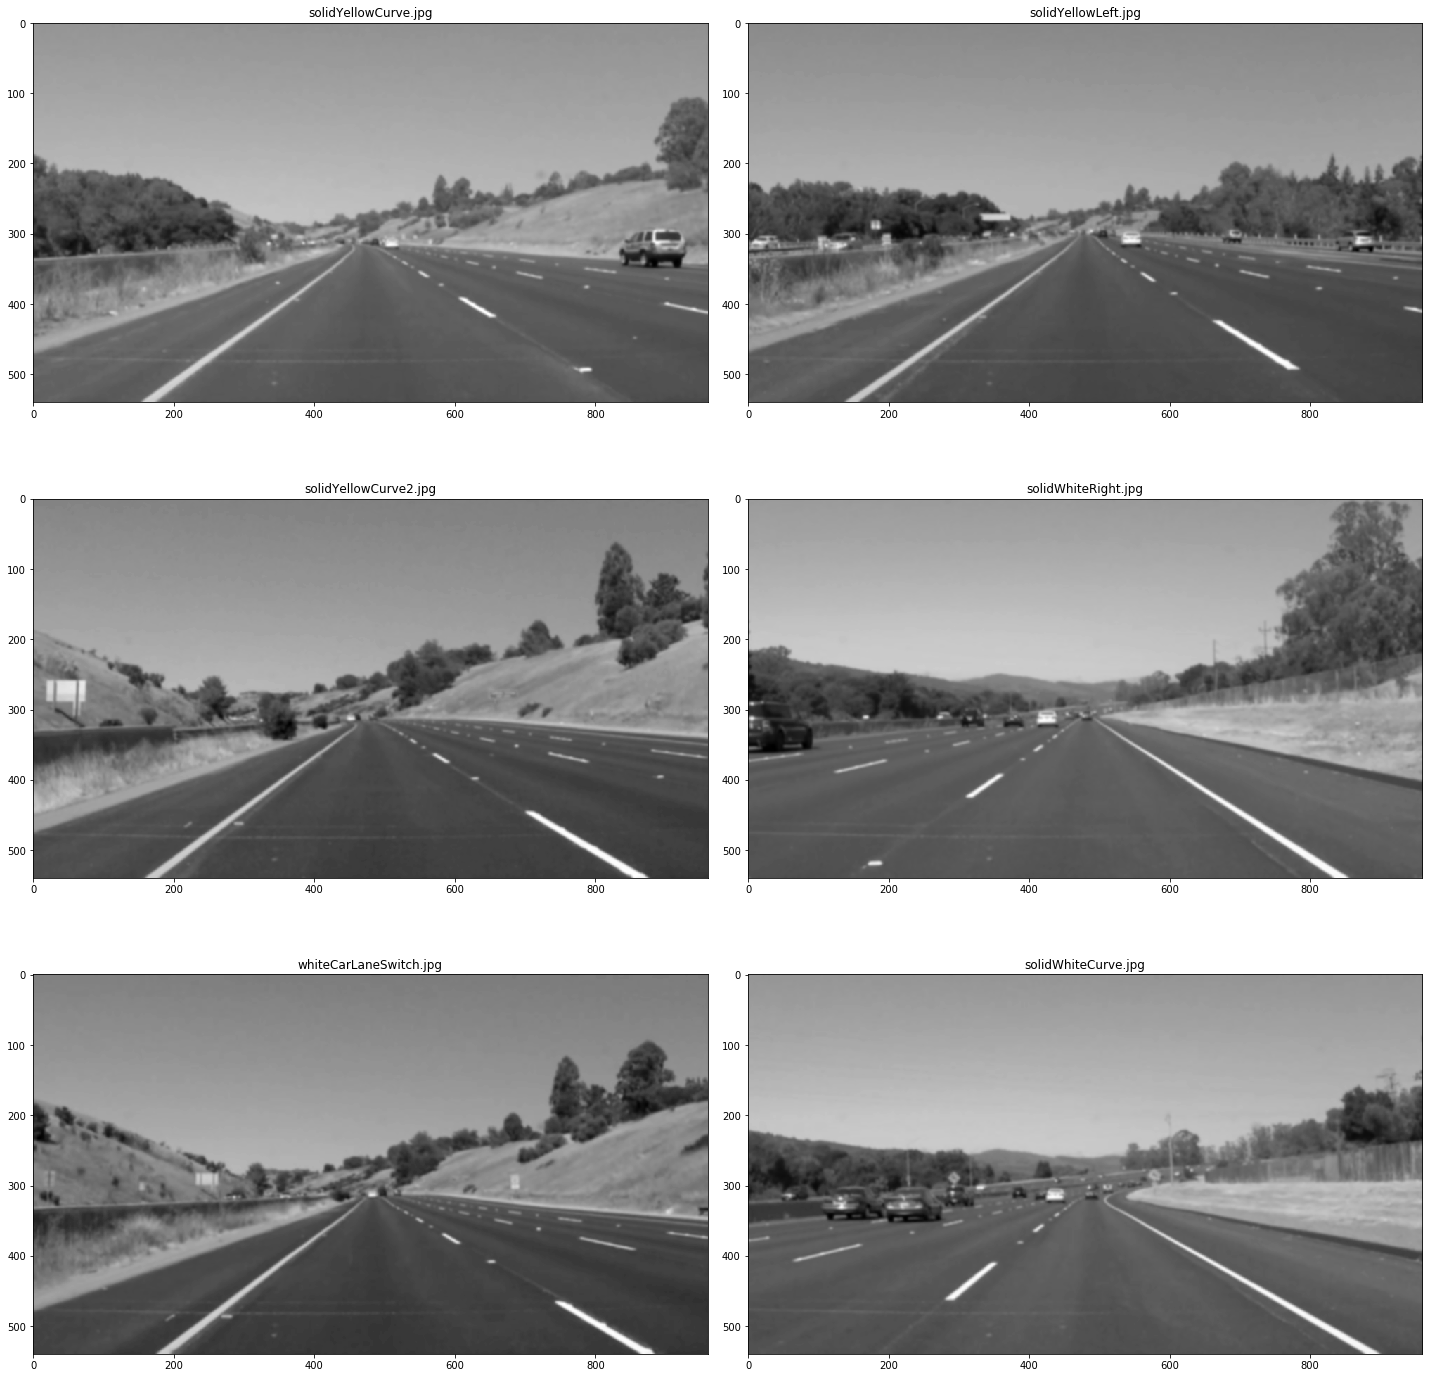

In [15]:
show_image_list(blurred_images)

## Step 3:Canny Edge Detection

We can apply a Canny Edge Detector to identify edges in an image and discard all other data.

In [16]:
def canny_edge_detector(blurred_img, low_threshold, high_threshold):
    return cv2.Canny(blurred_img, low_threshold, high_threshold)

In [17]:
canny_images = list(map(lambda img: canny_edge_detector(img, 50, 150), blurred_images))

(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)


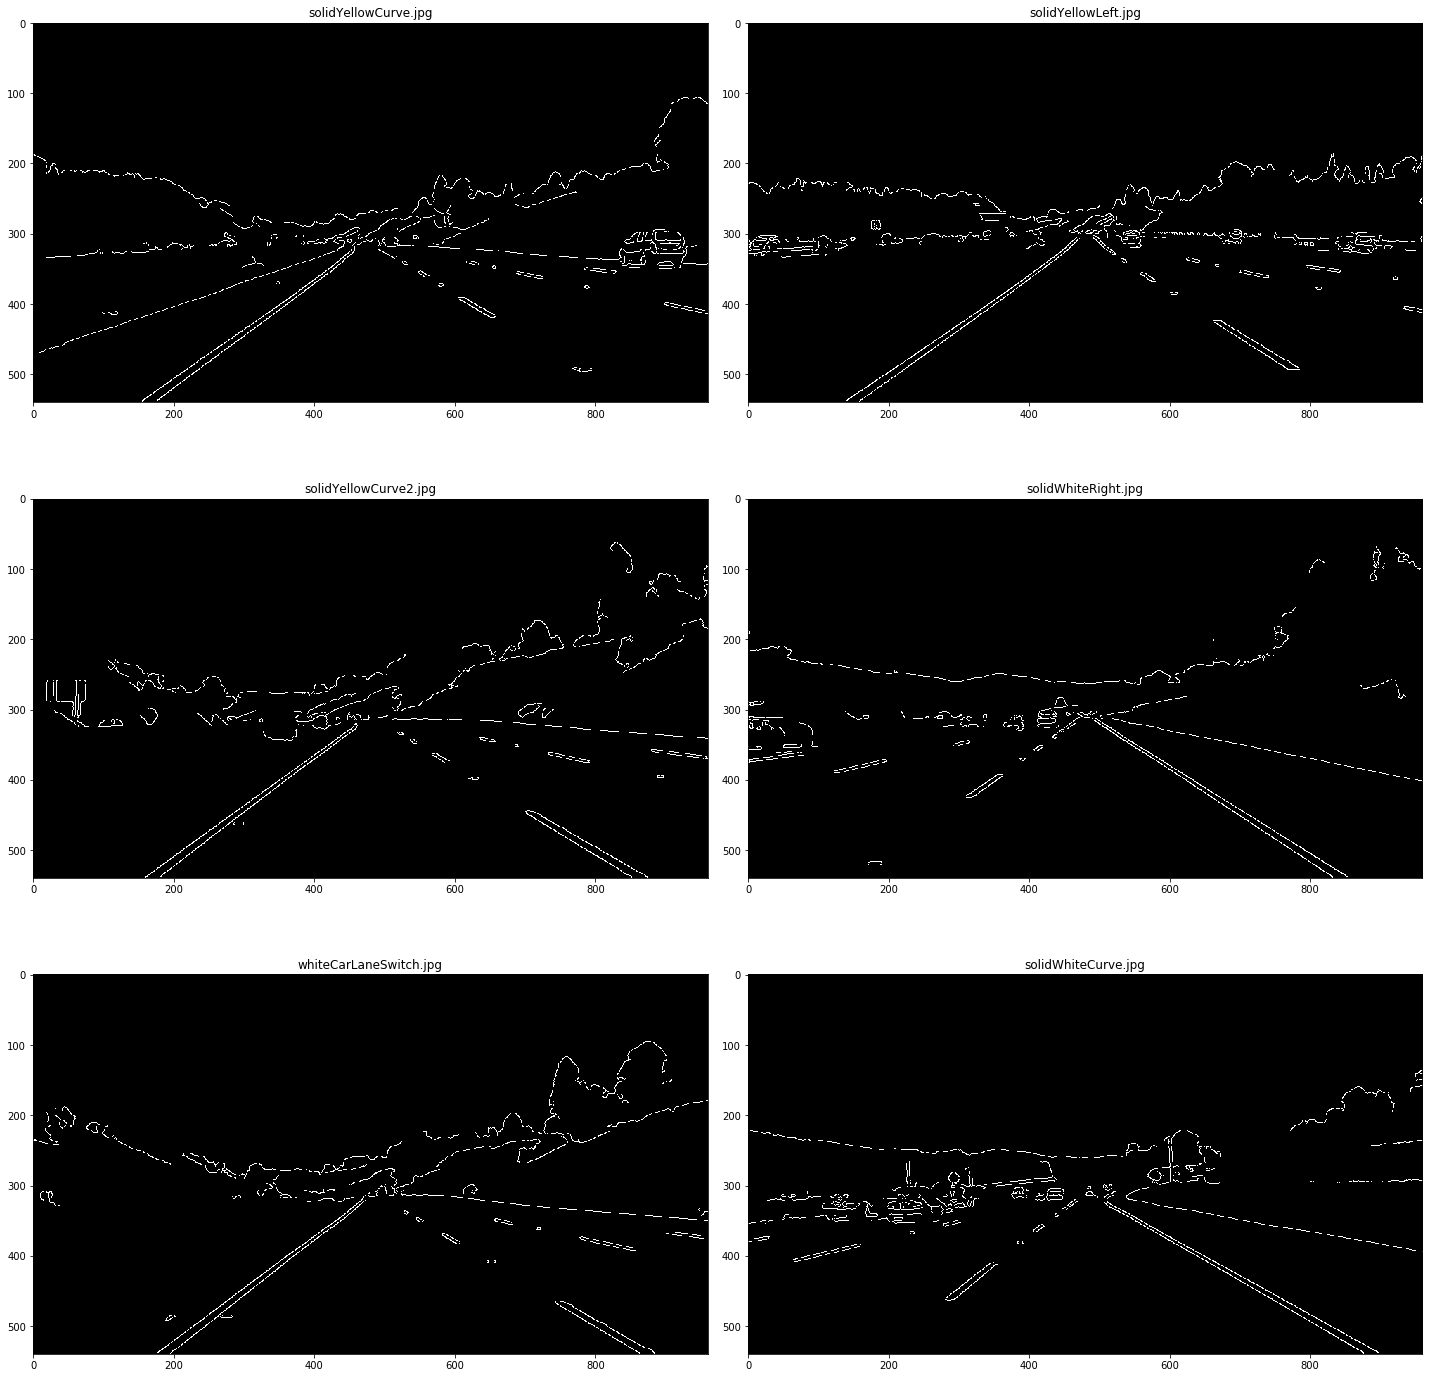

In [18]:
show_image_list(canny_images)

## Step 4: Region Of Interest

We will determine a region of interest and discard any lines outside of this polygon.

In [19]:
def get_vertices_for_img(img):
    imshape = img.shape
    height = imshape[0]
    width = imshape[1]

    vert = None
    
    if (width, height) == (960, 540):
        region_bottom_left = (130 ,img_shape[0] - 1)
        region_top_left = (410, 330)
        region_top_right = (650, 350)
        region_bottom_right = (img_shape[1] - 30,img_shape[0] - 1)
        vert = np.array([[region_bottom_left , region_top_left, region_top_right, region_bottom_right]], dtype=np.int32)
    else:
        region_bottom_left = (200 , 680)
        region_top_left = (600, 450)
        region_top_right = (750, 450)
        region_bottom_right = (1100, 650)
        vert = np.array([[region_bottom_left , region_top_left, region_top_right, region_bottom_right]], dtype=np.int32)

    return vert

def region_of_interest(img):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
        
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    vert = get_vertices_for_img(img)    
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vert, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [20]:
segmented_images = list(map(lambda img: region_of_interest(img), canny_images))


(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)
(540, 960)


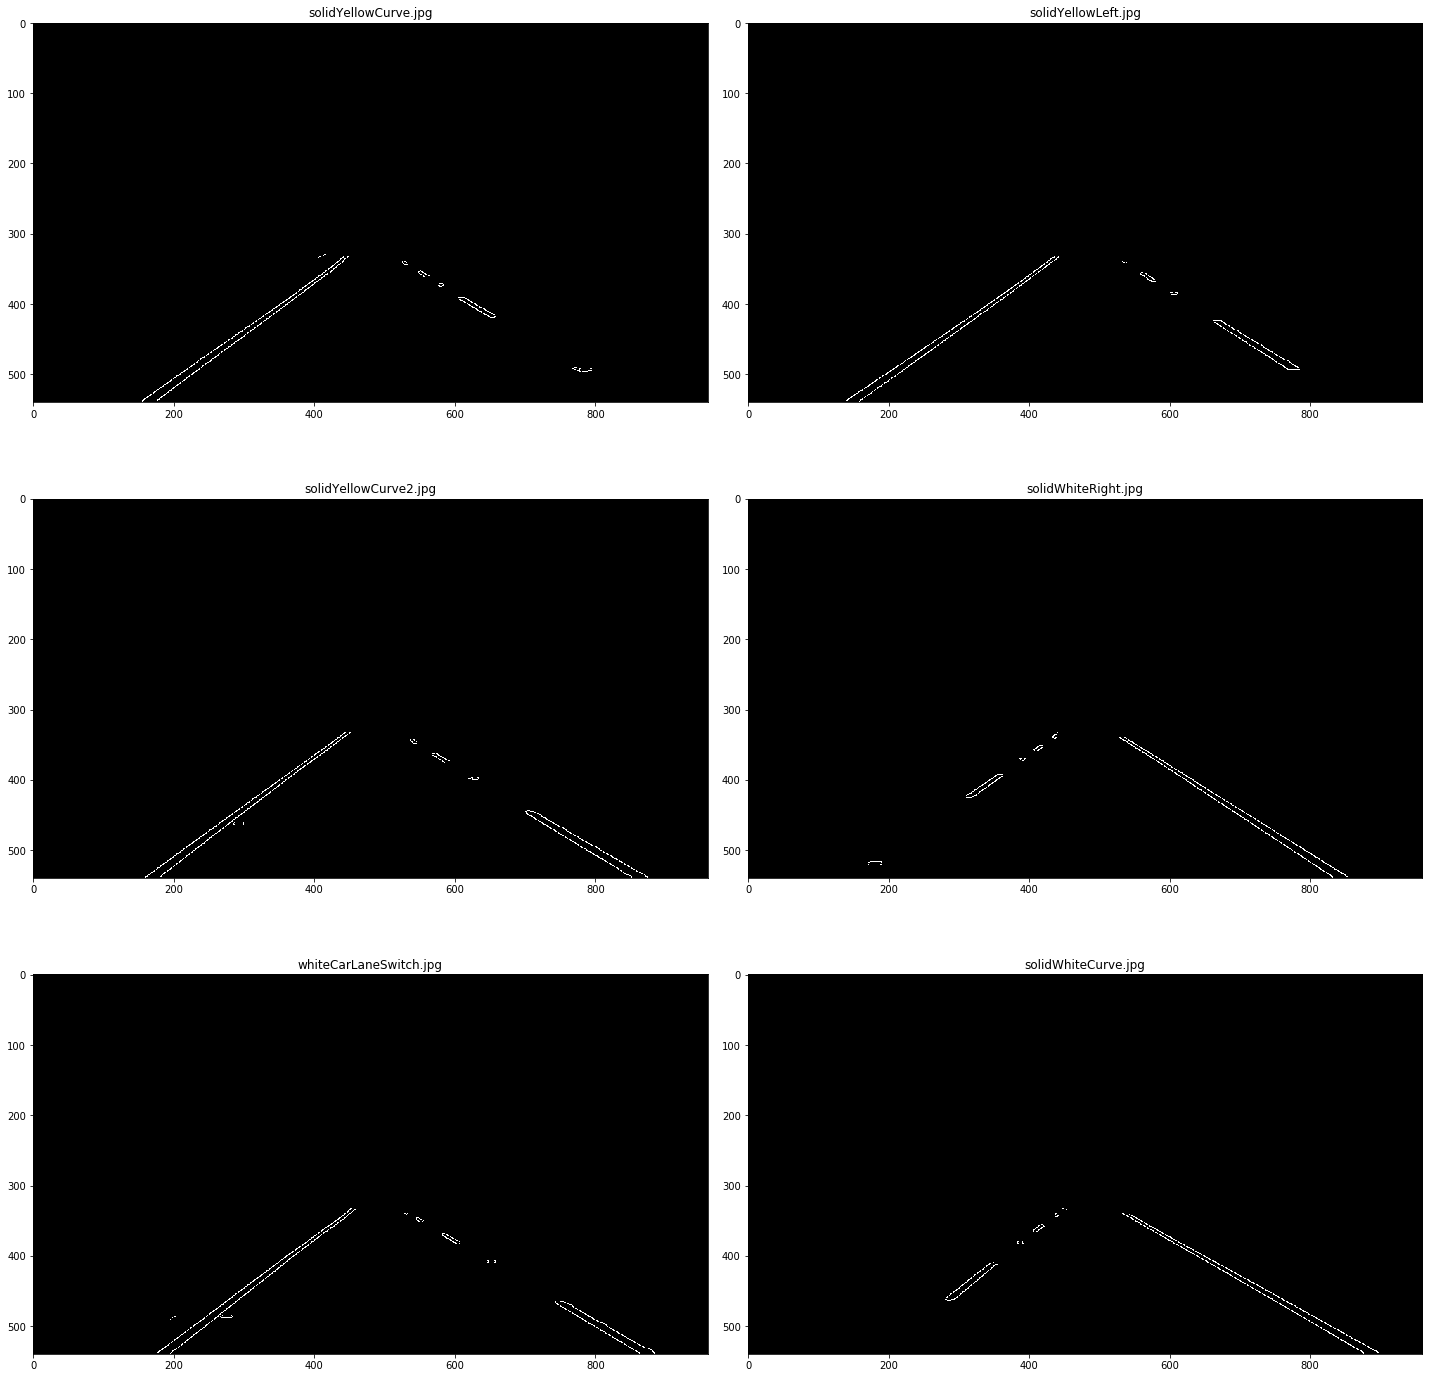

In [21]:
show_image_list(segmented_images)

## Step 5 : Hough Transform

We need to do Hough Transform to extract lines and color them

In [17]:
def hough_transform(canny_img, rho, theta, threshold, min_line_len, max_line_gap):
    return cv2.HoughLinesP(canny_img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

In [18]:
rho = 1
theta = (np.pi/180) * 1
threshold = 15
min_line_length = 20
max_line_gap = 10

In [19]:
hough_lines_per_image = list(map(lambda img: hough_transform(img, rho, theta, threshold, min_line_length, max_line_gap), 
                                 segmented_images))

In [20]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=10, make_copy=True):
    # Copy the passed image
    img_copy = np.copy(img) if make_copy else img
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img_copy, (x1, y1), (x2, y2), color, thickness)
    
    return img_copy

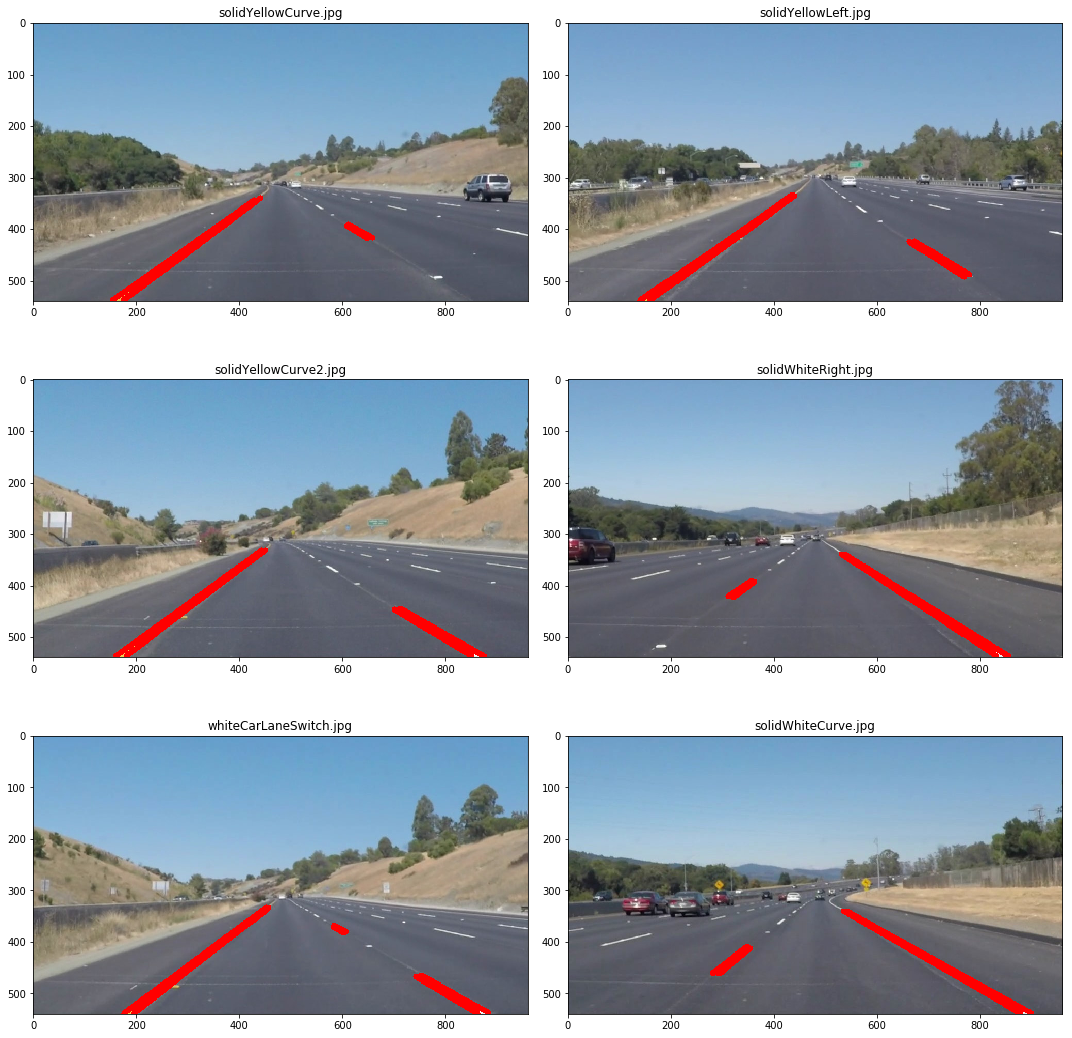

In [21]:
img_with_lines = list(map(lambda img, lines: draw_lines(img, lines), original_images, hough_lines_per_image))    
show_image_list(img_with_lines, fig_size=(15, 15))

## Step 6: Separate left and Right Lane

we can separate left and right by finding Slope.

* Left line : Gradient will be negative [as value of y decreases with increase in x value]
* Right line : Gradient will be positive [as value of y decrease with decrease in x value]
    
    if two points (x1,y1) (x2,y2) are given : Slope = (y2-y1)/(x2-x1)

In [22]:
def separate_lines(lines, img):
    img_shape = img.shape
    
    middle_x = img_shape[1] / 2
    print(middle_x)
    
    left_lane_lines = []
    right_lane_lines = []

    for line in lines:
        for x1, y1, x2, y2 in line:
            dx = x2 - x1 
            if dx == 0:
                #Discarding line since we can't gradient is undefined at this dx
                continue
            dy = y2 - y1
            
            # Similarly, if the y value remains constant as x increases, discard line
            if dy == 0:
                continue
            
            slope = dy / dx
            
           
            # but get rid of lines with a small slope as they are likely to be horizontal one
            epsilon = 0.1
            if abs(slope) <= epsilon:
                continue
            
            if slope < 0 and x1 < middle_x and x2 < middle_x:
                # Lane should also be within the left hand side of region of interest
                left_lane_lines.append([[x1, y1, x2, y2]])
            elif x1 >= middle_x and x2 >= middle_x:
                # Lane should also be within the right hand side of region of interest
                right_lane_lines.append([[x1, y1, x2, y2]])
    
    return left_lane_lines, right_lane_lines

In [23]:
separated_lanes_per_image = list(map(lambda lines, img: separate_lines(lines, img), hough_lines_per_image, original_images))

480.0
480.0
480.0
480.0
480.0
480.0


In [24]:
def color_lanes(img, left_lane_lines, right_lane_lines, left_lane_color=[255, 0, 0], right_lane_color=[0, 0, 255]):
    left_colored_img = draw_lines(img, left_lane_lines, color=left_lane_color, make_copy=True)
    right_colored_img = draw_lines(left_colored_img, right_lane_lines, color=right_lane_color, make_copy=False)
    
    return right_colored_img

In [25]:
img_different_lane_colors = list(map(lambda img, separated_lanes: color_lanes(img, separated_lanes[0], separated_lanes[1]), original_images, separated_lanes_per_image))

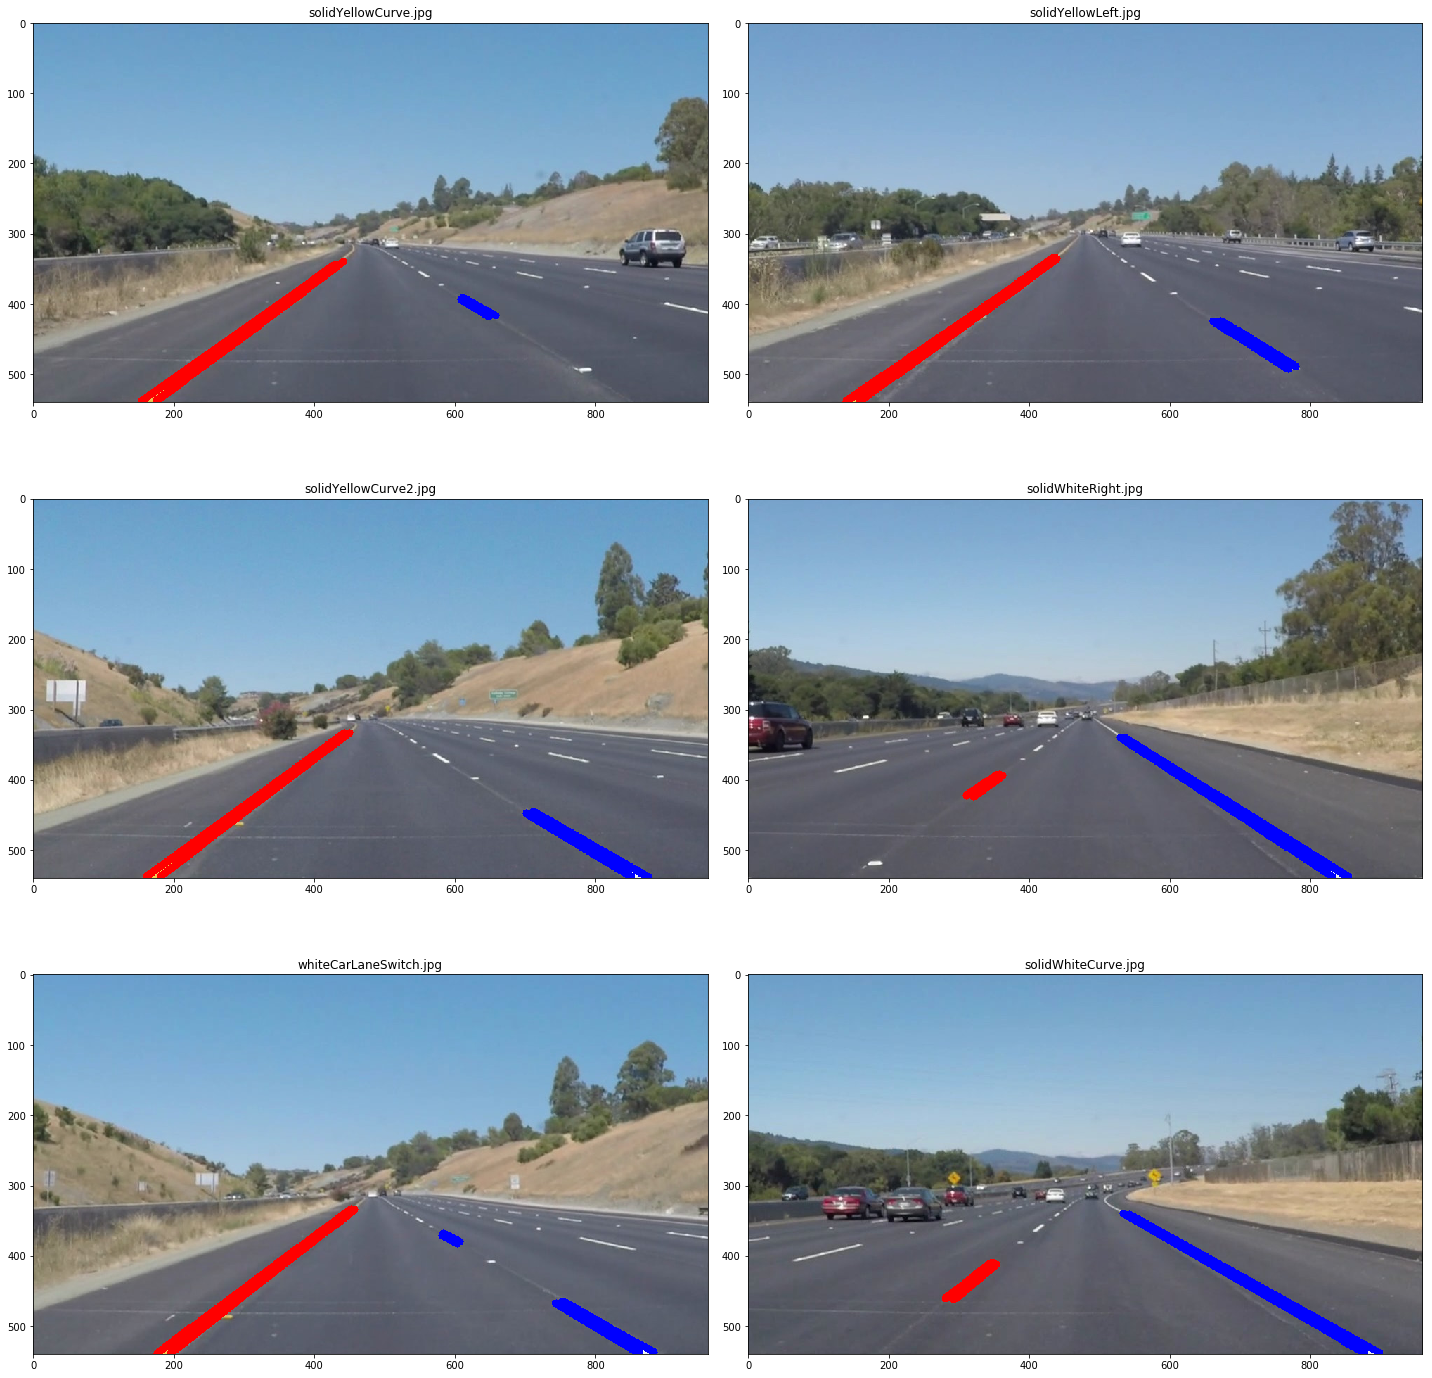

In [26]:
show_image_list(img_different_lane_colors)

## Step 7: Lane Extrapolation

Trace full line from the bottom of the screen to the highest point of our region of interest.

In [ ]:
### from scipy import stats

def find_lane_lines_formula(lines):
    xs = []
    ys = []
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            xs.append(x1)
            xs.append(x2)
            ys.append(y1)
            ys.append(y2)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
    
    # Remember, a straight line is expressed as f(x) = Ax + b. Slope is the A, while intercept is the b
    return (slope, intercept)

In [28]:
def trace_lane_line(img, lines, top_y, make_copy=True):
    A, b = find_lane_lines_formula(lines)
    vert = get_vertices_for_img(img)

    img_shape = img.shape
    bottom_y = img_shape[0] - 1
    # y = Ax + b, therefore x = (y - b) / A
    x_to_bottom_y = (bottom_y - b) / A
    
    top_x_to_y = (top_y - b) / A 
    
    new_lines = [[[int(x_to_bottom_y), int(bottom_y), int(top_x_to_y), int(top_y)]]]
    return draw_lines(img, new_lines, make_copy=make_copy)

def trace_both_lane_lines(img, left_lane_lines, right_lane_lines):
    vert = get_vertices_for_img(img)
    region_top_left = vert[0][1]
    
    full_left_lane_img = trace_lane_line(img, left_lane_lines, region_top_left[1], make_copy=True)
    full_left_right_lanes_img = trace_lane_line(full_left_lane_img, right_lane_lines, region_top_left[1], make_copy=False)
    
    # image1 * α + image2 * β + λ
    # image1 and image2 must be the same shape.
    img_with_lane_weight =  cv2.addWeighted(img, 0.7, full_left_right_lanes_img, 0.3, 0.0)
    
    return img_with_lane_weight

In [29]:
full_lane_drawn_images = list(map(lambda img, separated_lanes : trace_both_lane_lines(img, separated_lanes[0], separated_lanes[1]), 
                                  original_images, separated_lanes_per_image))

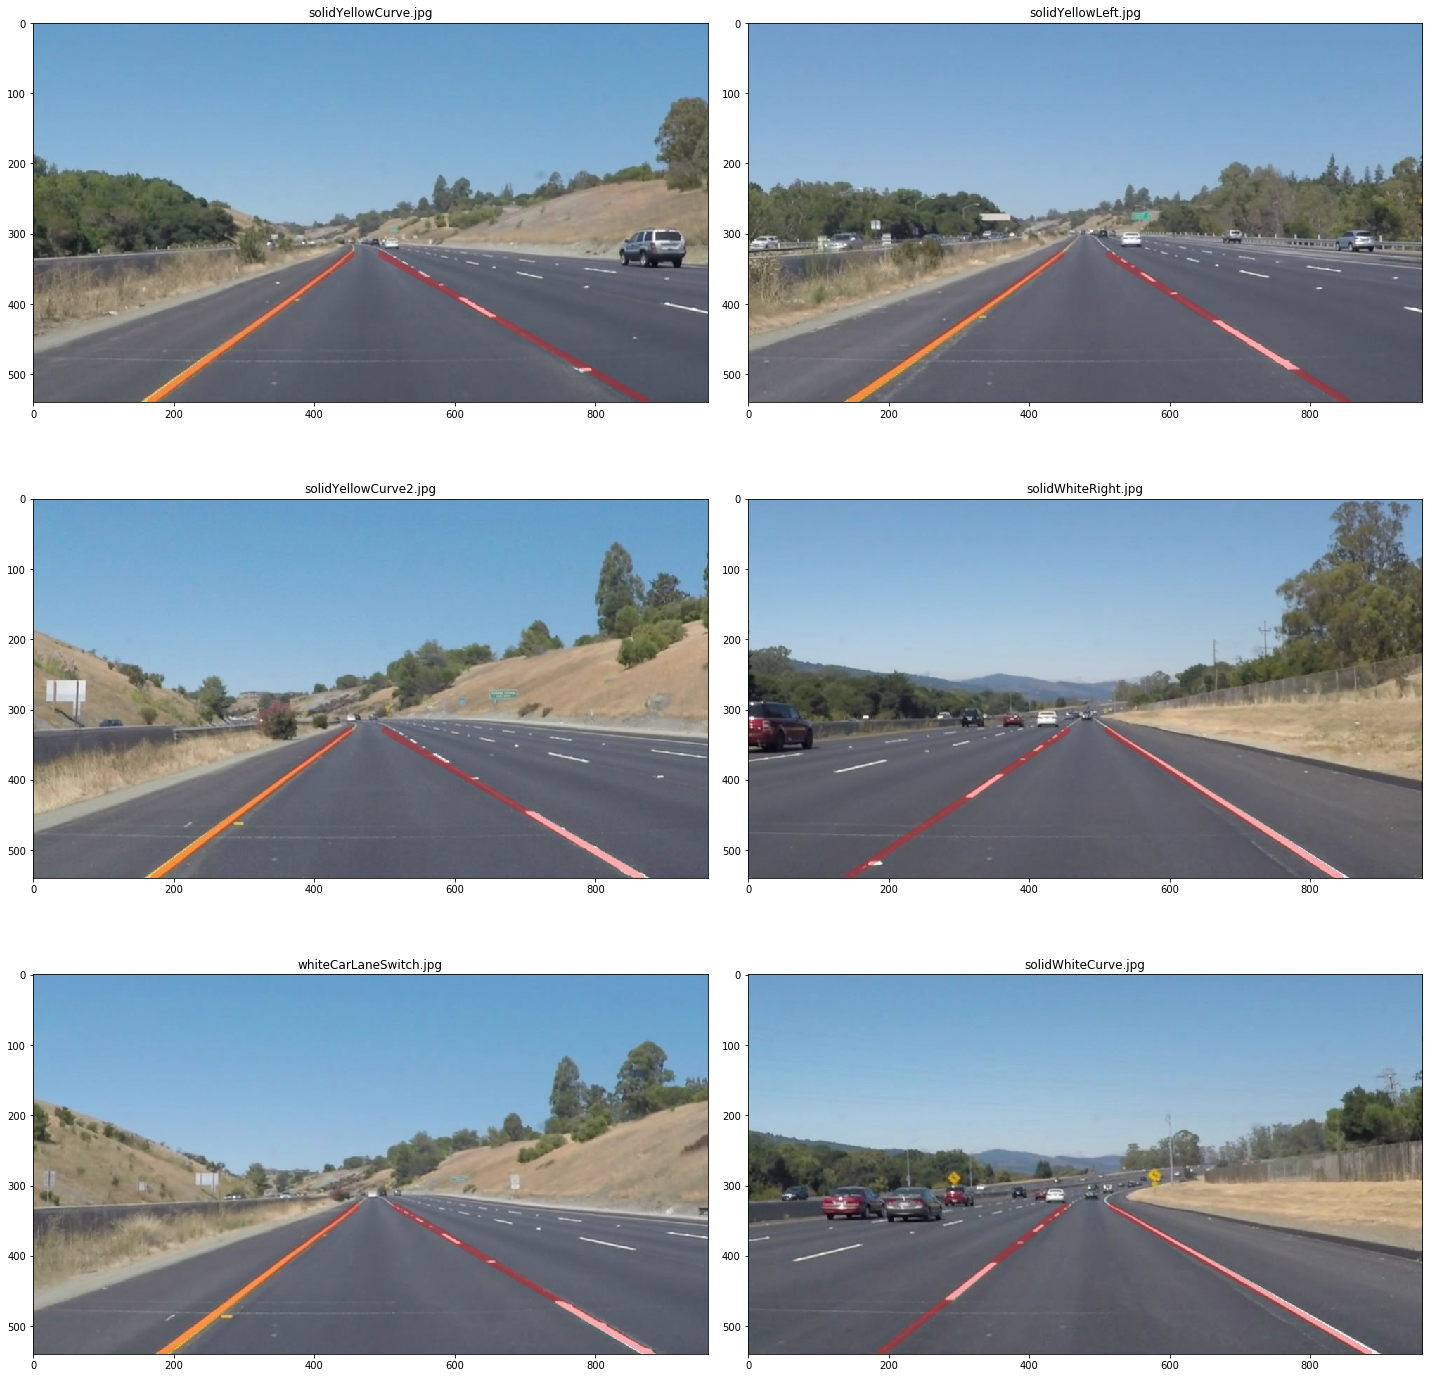

In [30]:
show_image_list(full_lane_drawn_images)

# Test on Videos

In [31]:
from collections import deque

def create_lane_line_coefficients_list(length = 10):
    return deque(maxlen=length)

In [32]:
def trace_lane_line_with_coefficients(img, line_coefficients, top_y, make_copy=True):
    A = line_coefficients[0]
    b = line_coefficients[1]
    
    img_shape = img.shape
    bottom_y = img_shape[0] - 1
    # y = Ax + b, therefore x = (y - b) / A
    x_to_bottom_y = (bottom_y - b) / A
    
    top_x_to_y = (top_y - b) / A 
    
    new_lines = [[[int(x_to_bottom_y), int(bottom_y), int(top_x_to_y), int(top_y)]]]
    return draw_lines(img, new_lines, make_copy=make_copy)


def trace_both_lane_lines_with_lines_coefficients(img, left_line_coefficients, right_line_coefficients):
    vert = get_vertices_for_img(img)
    region_top_left = vert[0][1]
    
    full_left_lane_img = trace_lane_line_with_coefficients(img, left_line_coefficients, region_top_left[1], make_copy=True)
    full_left_right_lanes_img = trace_lane_line_with_coefficients(full_left_lane_img, right_line_coefficients, region_top_left[1], make_copy=False)
    
    # image1 * α + image2 * β + λ
    # image1 and image2 must be the same shape.
    img_with_lane_weight =  cv2.addWeighted(img, 0.7, full_left_right_lanes_img, 0.3, 0.0)
    
    return img_with_lane_weight

In [33]:
import math

MAXIMUM_SLOPE_DIFF = 0.1
MAXIMUM_INTERCEPT_DIFF = 50.0

class LaneDetectorWithMemory:
    def __init__(self):
        self.left_lane_coefficients  = create_lane_line_coefficients_list()
        self.right_lane_coefficients = create_lane_line_coefficients_list()
        
        self.previous_left_lane_coefficients = None
        self.previous_right_lane_coefficients = None
        
    
    def mean_coefficients(self, coefficients_queue, axis=0):        
        return [0, 0] if len(coefficients_queue) == 0 else np.mean(coefficients_queue, axis=axis)
    
    def determine_line_coefficients(self, stored_coefficients, current_coefficients):
        if len(stored_coefficients) == 0:
            stored_coefficients.append(current_coefficients) 
            return current_coefficients
        
        mean = self.mean_coefficients(stored_coefficients)
        abs_slope_diff = abs(current_coefficients[0] - mean[0])
        abs_intercept_diff = abs(current_coefficients[1] - mean[1])
        
        if abs_slope_diff > MAXIMUM_SLOPE_DIFF or abs_intercept_diff > MAXIMUM_INTERCEPT_DIFF:
            #print("Identified big difference in slope (", current_coefficients[0], " vs ", mean[0],
             #    ") or intercept (", current_coefficients[1], " vs ", mean[1], ")")
            
            # In this case use the mean
            return mean
        else:
            # Save our coefficients and returned a smoothened one
            stored_coefficients.append(current_coefficients)
            return self.mean_coefficients(stored_coefficients)
        

    def lane_detection_pipeline(self, img):
        
        grayscale_img = grayscale(img)
        gaussian_smoothed_img = gaussian_blur(grayscale_img, kernel_size=5)
        canny_img = canny_edge_detector(gaussian_smoothed_img, 50, 150)
        segmented_img = region_of_interest(canny_img)
        hough_lines = hough_transform(segmented_img, rho, theta, threshold, min_line_length, max_line_gap)

        try:
            left_lane_lines, right_lane_lines = separate_lines(hough_lines, img)
            left_lane_slope, left_intercept = find_lane_lines_formula(left_lane_lines)
            right_lane_slope, right_intercept = find_lane_lines_formula(right_lane_lines)
            smoothed_left_lane_coefficients = self.determine_line_coefficients(self.left_lane_coefficients, [left_lane_slope, left_intercept])
            smoothed_right_lane_coefficients = self.determine_line_coefficients(self.right_lane_coefficients, [right_lane_slope, right_intercept])
            img_with_lane_lines = trace_both_lane_lines_with_lines_coefficients(img, smoothed_left_lane_coefficients, smoothed_right_lane_coefficients)
        
            return img_with_lane_lines

        except Exception as e:
            print("*** Error - will use saved coefficients ", e)
            smoothed_left_lane_coefficients = self.determine_line_coefficients(self.left_lane_coefficients, [0.0, 0.0])
            smoothed_right_lane_coefficients = self.determine_line_coefficients(self.right_lane_coefficients, [0.0, 0.0])
            img_with_lane_lines = trace_both_lane_lines_with_lines_coefficients(img, smoothed_left_lane_coefficients, smoothed_right_lane_coefficients)
        
            return img_with_lane_lines

### Solid White Lane Marking

In [34]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [35]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
detector = LaneDetectorWithMemory()

clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(detector.lane_detection_pipeline)
%time white_clip.write_videofile(white_output, audio=False)

480.0
[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


  0%|          | 0/222 [00:00<?, ?it/s]

480.0
480.0
480.0
480.0
480.0
480.0

  5%|▍         | 10/222 [00:00<00:02, 96.67it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


  9%|▉         | 21/222 [00:00<00:02, 99.02it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 14%|█▍        | 32/222 [00:00<00:01, 100.03it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 19%|█▉        | 42/222 [00:00<00:01, 99.37it/s] 

480.0
480.0
480.0
480.0
480.0


 23%|██▎       | 50/222 [00:00<00:02, 78.61it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 26%|██▌       | 58/222 [00:00<00:02, 78.94it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 30%|██▉       | 66/222 [00:00<00:02, 76.80it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 33%|███▎      | 74/222 [00:00<00:01, 76.79it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 37%|███▋      | 83/222 [00:00<00:01, 78.32it/s]

480.0
480.0
480.0
480.0
480.0
480.0


 41%|████      | 91/222 [00:01<00:01, 74.03it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 45%|████▍     | 99/222 [00:01<00:01, 72.84it/s]

480.0
480.0
480.0
480.0
480.0
480.0


 48%|████▊     | 107/222 [00:01<00:01, 74.24it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 52%|█████▏    | 115/222 [00:01<00:01, 73.78it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 55%|█████▌    | 123/222 [00:01<00:01, 73.05it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 59%|█████▉    | 131/222 [00:01<00:01, 73.18it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0


 63%|██████▎   | 139/222 [00:01<00:01, 72.31it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 66%|██████▌   | 147/222 [00:01<00:01, 73.57it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 70%|███████   | 156/222 [00:01<00:00, 75.10it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 74%|███████▍  | 164/222 [00:02<00:00, 74.57it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 77%|███████▋  | 172/222 [00:02<00:00, 74.93it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 81%|████████  | 180/222 [00:02<00:00, 75.60it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 85%|████████▍ | 188/222 [00:02<00:00, 74.41it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 88%|████████▊ | 196/222 [00:02<00:00, 70.65it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 92%|█████████▏| 204/222 [00:02<00:00, 70.77it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


100%|█████████▉| 221/222 [00:02<00:00, 76.90it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 2.3 s, sys: 786 ms, total: 3.09 s
Wall time: 3.38 s


In [36]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

### Yellow And White Lane Markings

In [39]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')

#clip2.save_frame("test_images/video_yellow_lane_left_12s.jpg", t=12) # saves the frame
#clip2.save_frame("test_images/video_yellow_lane_left_13s.jpg", t=13) # saves the frame
#clip2.save_frame("test_images/video_yellow_lane_left_5s.jpg", t=5) # saves the frame
#clip2.save_frame("test_images/video_yellow_lane_left_6s.jpg", t=6) # saves the frame

detector = LaneDetectorWithMemory()
yellow_clip = clip2.fl_image(detector.lane_detection_pipeline)
%time yellow_clip.write_videofile(yellow_output, audio=False)

480.0
[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


  0%|          | 0/682 [00:00<?, ?it/s]

480.0
480.0
480.0
480.0
480.0


  3%|▎         | 20/682 [00:00<00:07, 92.66it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


  5%|▍         | 31/682 [00:00<00:06, 95.73it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

  6%|▌         | 42/682 [00:00<00:06, 98.46it/s]


480.0
480.0
480.0
480.0
480.0


  7%|▋         | 50/682 [00:00<00:07, 83.18it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

  9%|▊         | 58/682 [00:00<00:07, 81.33it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0


 10%|▉         | 66/682 [00:00<00:07, 79.09it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 11%|█         | 74/682 [00:00<00:07, 78.32it/s]

480.0
480.0
480.0
480.0
480.0
480.0


 12%|█▏        | 82/682 [00:00<00:07, 76.27it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 13%|█▎        | 90/682 [00:01<00:07, 76.42it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 14%|█▍        | 98/682 [00:01<00:07, 75.95it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 16%|█▌        | 106/682 [00:01<00:07, 74.36it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0

 17%|█▋        | 114/682 [00:01<00:07, 73.13it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 18%|█▊        | 122/682 [00:01<00:07, 74.81it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0


 19%|█▉        | 131/682 [00:01<00:07, 75.96it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 21%|██        | 140/682 [00:01<00:06, 78.36it/s]

480.0
480.0
480.0
480.0
480.0
480.0


 22%|██▏       | 148/682 [00:01<00:06, 76.72it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 23%|██▎       | 156/682 [00:01<00:06, 76.76it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 24%|██▍       | 164/682 [00:02<00:06, 76.88it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 25%|██▌       | 173/682 [00:02<00:06, 78.73it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 27%|██▋       | 181/682 [00:02<00:06, 77.67it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 28%|██▊       | 190/682 [00:02<00:06, 78.89it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 29%|██▉       | 198/682 [00:02<00:06, 75.34it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 30%|███       | 206/682 [00:02<00:06, 76.26it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 31%|███▏      | 214/682 [00:02<00:06, 77.08it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 33%|███▎      | 223/682 [00:02<00:05, 77.98it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0


 34%|███▍      | 231/682 [00:02<00:05, 78.30it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 35%|███▌      | 239/682 [00:03<00:05, 77.69it/s]


480.0
480.0
480.0
480.0
480.0
480.0


 36%|███▌      | 247/682 [00:03<00:05, 77.82it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 37%|███▋      | 255/682 [00:03<00:05, 78.05it/s]

480.0
480.0
480.0
480.0
480.0
480.0


 39%|███▊      | 263/682 [00:03<00:05, 77.08it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 40%|███▉      | 272/682 [00:03<00:05, 79.63it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 41%|████      | 280/682 [00:03<00:05, 78.65it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 42%|████▏     | 288/682 [00:03<00:05, 78.05it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 43%|████▎     | 296/682 [00:03<00:05, 72.76it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 45%|████▍     | 305/682 [00:03<00:04, 76.91it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 46%|████▌     | 313/682 [00:03<00:04, 77.35it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 47%|████▋     | 321/682 [00:04<00:04, 77.93it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 48%|████▊     | 329/682 [00:04<00:04, 77.64it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 49%|████▉     | 337/682 [00:04<00:04, 76.85it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 51%|█████     | 345/682 [00:04<00:04, 77.42it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 52%|█████▏    | 353/682 [00:04<00:04, 78.06it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 53%|█████▎    | 361/682 [00:04<00:04, 74.36it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0


 54%|█████▍    | 369/682 [00:04<00:04, 75.95it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 55%|█████▌    | 378/682 [00:04<00:03, 76.94it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 57%|█████▋    | 387/682 [00:04<00:03, 77.60it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 58%|█████▊    | 395/682 [00:05<00:03, 77.92it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 59%|█████▉    | 404/682 [00:05<00:03, 79.65it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 60%|██████    | 412/682 [00:05<00:03, 79.49it/s]


480.0
480.0
480.0
480.0
480.0
480.0


 62%|██████▏   | 420/682 [00:05<00:03, 77.26it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 63%|██████▎   | 428/682 [00:05<00:03, 77.22it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 64%|██████▍   | 436/682 [00:05<00:03, 75.19it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 65%|██████▌   | 444/682 [00:05<00:03, 71.28it/s]

480.0
480.0
480.0
480.0
480.0


 66%|██████▋   | 452/682 [00:05<00:03, 71.97it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 67%|██████▋   | 460/682 [00:05<00:03, 72.82it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0

 69%|██████▊   | 468/682 [00:06<00:02, 73.49it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 70%|██████▉   | 476/682 [00:06<00:02, 72.40it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


 71%|███████   | 484/682 [00:06<00:02, 73.51it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 73%|███████▎  | 501/682 [00:06<00:02, 74.73it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 76%|███████▌  | 517/682 [00:06<00:02, 74.39it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 78%|███████▊  | 533/682 [00:06<00:01, 74.68it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 81%|████████  | 551/682 [00:07<00:01, 79.52it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 83%|████████▎ | 569/682 [00:07<00:01, 81.44it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 85%|████████▍ | 578/682 [00:07<00:01, 79.39it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 86%|████████▌ | 586/682 [00:07<00:01, 78.35it/s]

480.0
480.0
480.0
480.0
480.0
480.0


 87%|████████▋ | 594/682 [00:07<00:01, 77.84it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 88%|████████▊ | 603/682 [00:07<00:00, 79.91it/s]

480.0
480.0
480.0
480.0
480.0
480.0

 90%|████████▉ | 612/682 [00:07<00:00, 77.52it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 91%|█████████ | 621/682 [00:07<00:00, 79.29it/s]

480.0
480.0
480.0
480.0
480.0
480.0

 92%|█████████▏| 630/682 [00:08<00:00, 80.80it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 94%|█████████▎| 639/682 [00:08<00:00, 78.90it/s]

480.0
480.0
480.0
480.0
480.0
480.0

 95%|█████████▍| 647/682 [00:08<00:00, 77.35it/s]


480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0

 96%|█████████▌| 655/682 [00:08<00:00, 77.95it/s]


480.0
480.0
480.0
480.0
480.0
480.0


 97%|█████████▋| 663/682 [00:08<00:00, 76.87it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0
480.0


 99%|█████████▊| 672/682 [00:08<00:00, 78.41it/s]

480.0
480.0
480.0
480.0
480.0
480.0
480.0


100%|█████████▉| 681/682 [00:08<00:00, 77.73it/s]

480.0
480.0
480.0
480.0
480.0
480.0


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 7.05 s, sys: 2.28 s, total: 9.33 s
Wall time: 9.27 s


In [40]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [41]:

challenge_output = 'test_videos_output/challenge.mp4'
clip3 = VideoFileClip('test_videos/challenge.mp4')


detector = LaneDetectorWithMemory()
challenge_clip = clip3.fl_image(detector.lane_detection_pipeline)
%time challenge_clip.write_videofile(challenge_output, audio=False)

640.0
[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


  0%|          | 0/251 [00:00<?, ?it/s]

640.0
640.0
640.0
640.0


  2%|▏         | 6/251 [00:00<00:04, 59.31it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


  5%|▌         | 13/251 [00:00<00:03, 60.40it/s]

640.0
640.0
640.0
640.0
640.0


  8%|▊         | 21/251 [00:00<00:03, 63.85it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 11%|█         | 28/251 [00:00<00:03, 64.42it/s]

640.0
640.0
640.0
640.0

 14%|█▍        | 35/251 [00:00<00:03, 63.64it/s]


640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 17%|█▋        | 43/251 [00:00<00:03, 66.25it/s]

640.0
640.0
640.0
640.0
640.0

 20%|█▉        | 49/251 [00:00<00:04, 50.11it/s]


640.0
640.0
640.0
640.0
640.0


 22%|██▏       | 55/251 [00:00<00:03, 49.68it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0


 24%|██▍       | 61/251 [00:01<00:04, 45.91it/s]

640.0
640.0
640.0
640.0
640.0
640.0


 26%|██▋       | 66/251 [00:01<00:04, 44.48it/s]

640.0
640.0
640.0
640.0
640.0
640.0

 28%|██▊       | 71/251 [00:01<00:03, 45.49it/s]


640.0
640.0
640.0
640.0

 30%|███       | 76/251 [00:01<00:04, 43.19it/s]


640.0
640.0
640.0
640.0
640.0


 32%|███▏      | 81/251 [00:01<00:04, 40.60it/s]

640.0
640.0
640.0


 34%|███▍      | 86/251 [00:01<00:04, 40.25it/s]

640.0
640.0
640.0
640.0
640.0
640.0


 36%|███▋      | 91/251 [00:01<00:03, 41.84it/s]

640.0
640.0
640.0
640.0

 38%|███▊      | 96/251 [00:01<00:03, 40.50it/s]


640.0
640.0
640.0
640.0
640.0


 40%|████      | 101/251 [00:02<00:03, 40.80it/s]

640.0
640.0
640.0
640.0


 42%|████▏     | 106/251 [00:02<00:03, 40.90it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 46%|████▌     | 116/251 [00:02<00:03, 43.13it/s]

640.0
640.0
640.0
640.0
640.0
640.0


 48%|████▊     | 121/251 [00:02<00:03, 42.38it/s]

640.0
640.0
640.0
640.0
*** Error - will use saved coefficients  Inputs must not be empty.


 50%|█████     | 126/251 [00:02<00:03, 41.63it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
*** Error - will use saved coefficients  Inputs must not be empty.


 52%|█████▏    | 131/251 [00:02<00:03, 39.55it/s]

640.0
640.0
640.0
640.0
640.0


 54%|█████▍    | 135/251 [00:02<00:03, 36.58it/s]

640.0
640.0


 56%|█████▌    | 140/251 [00:03<00:03, 35.39it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0


 59%|█████▉    | 148/251 [00:03<00:02, 36.22it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 63%|██████▎   | 158/251 [00:03<00:02, 39.41it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 65%|██████▍   | 163/251 [00:03<00:02, 39.50it/s]

640.0
640.0
640.0
640.0


 67%|██████▋   | 168/251 [00:03<00:02, 36.06it/s]

640.0
640.0
640.0


 69%|██████▉   | 173/251 [00:03<00:02, 36.72it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0


 72%|███████▏  | 181/251 [00:04<00:01, 35.78it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 74%|███████▎  | 185/251 [00:04<00:01, 34.10it/s]

640.0
640.0
640.0
640.0
640.0
640.0


 76%|███████▌  | 190/251 [00:04<00:01, 36.05it/s]

640.0


 79%|███████▉  | 199/251 [00:04<00:01, 36.34it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 81%|████████  | 203/251 [00:04<00:01, 33.82it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0

 82%|████████▏ | 207/251 [00:04<00:01, 35.29it/s]


640.0
640.0


 84%|████████▍ | 211/251 [00:05<00:01, 36.47it/s]

640.0
640.0
640.0
640.0
640.0
640.0


 86%|████████▌ | 215/251 [00:05<00:01, 35.10it/s]

640.0


 87%|████████▋ | 219/251 [00:05<00:00, 33.74it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0

 89%|████████▉ | 223/251 [00:05<00:00, 34.73it/s]


640.0


 92%|█████████▏| 232/251 [00:05<00:00, 37.09it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0


 94%|█████████▍| 236/251 [00:05<00:00, 37.28it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0

 96%|█████████▌| 241/251 [00:05<00:00, 37.45it/s]


640.0


 99%|█████████▉| 249/251 [00:06<00:00, 38.01it/s]

640.0
640.0
640.0
640.0
640.0
640.0
640.0
640.0

100%|██████████| 251/251 [00:06<00:00, 40.78it/s]



640.0
[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 4.56 s, sys: 1.27 s, total: 5.83 s
Wall time: 7.11 s


In [42]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))